In [7]:
#Import Libraries
import numpy as np 
from numpy import mean,std
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [8]:
df = pd.read_csv('Documents/Data-science/merc.csv')
df["fuelType"].unique()
df_x=df[['year','mileage','tax','mpg','engineSize']]
df_y=df['price']


Построить прогноз, используя модели линейной регрессии и случайного леса. Сравнить результаты, используя кросс-валидацию. Подобрать гиперпараметры моделей (для линейной регрессии можно использовать реализацию с градиентным спуском SGDRegressor). Оценить качество, используя метрику r2_score. Оценить важность признаков (параметр feature_importance_ у случайного леса).

In [18]:
x =df_x.values
y = df_y.values
x_train, x_test, y_train, y_test = train_test_split(x, y)

Линейная регрессия : cv=12 

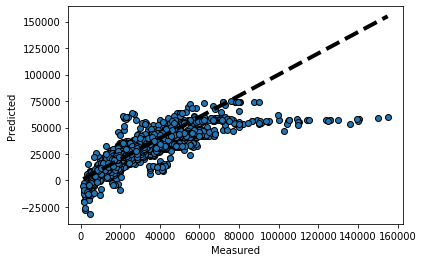

In [19]:
lr = LinearRegression()
predicted = cross_val_predict(lr, x_train, y_train, cv=2)
fig, ax = plt.subplots()
y= y_train
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [20]:
predicted = cross_val_score(lr, x_train, y_train, cv=12)
print("Accurancy(mean)=",mean(predicted),"Std=",predicted.std())

Accurancy(mean)= 0.699775349306505 Std= 0.030072267594822764


Rendom_Forest_Regression : cv=12

In [22]:
reg = RandomForestRegressor(n_estimators=100, max_depth=10, criterion='mse', random_state=123, n_jobs=-1)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
score = cross_val_score(reg, x_train, y_train, cv=12)
print("Accurancy(mean)=",mean(score),"Std=",score.std())

Accurancy(mean)= 0.8963418450326351 Std= 0.016484793105423667


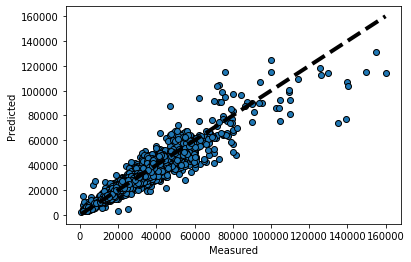

In [7]:
predicted = cross_val_predict(reg, x_train, y_train, cv=12)
fig, ax = plt.subplots()
y= y_train
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

При проверке моделей на точность модель дерева существенно лучше предсказывает точность на тестовой выборке, чем регрессионная модель при одинаковых параместрах cv.

In [23]:
from sklearn.metrics import r2_score

In [24]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.6589331425666293

In [25]:
reg = RandomForestRegressor(n_estimators=1000, max_depth=10, criterion='mse', random_state=123, n_jobs=-1)
reg.fit(x_train, y_train)
y_prediction = reg.predict(x_test)
r2_score(y_test, y_prediction)

0.90823434879

R2 (коэффициент детерминации) функция оценки регрессии также лучше у Дерева решений.

Подберем гиперпараметры моделей (для линейной регрессии можно использовать реализацию с градиентным спуском SGDRegressor).

In [26]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(x_train, y_train)
score = sgdr.score(x_train, y_train)
print("R-squared:", score)

R-squared: -1.860215934235436e+27


In [27]:
param = {
    'copy_X': [True, False],
    'fit_intercept': [True, False]
}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(LinearRegression(), param)
search.fit(x_train, y_train)
search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'fit_intercept': True, 'copy_X': True}

In [29]:
search.fit(x_train, y_train)
score = search.score(x_train, y_train)
print("R-squared:", score)

R-squared: 0.6990969704943782


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Градиентный бустинг 

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 12, n_iter = 10, n_jobs=-1)
randm_src.fit(x_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

Посмотрим на точность

In [31]:
model.fit(x_train, y_train)
score = model.score(x_train, y_train)
print("R-squared:", score)

R-squared: 0.8855710229745064


Гиперпараметры для леса:

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {
    'n_estimators': [5, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, 15, 20]
}
rend = RandomizedSearchCV(RandomForestRegressor(), params)
rend.fit(x_train, y_train)
rend.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
y_pred = rend.best_estimator_.predict(x_test)
r2_score(y_test, y_pred)

0.9095443793092923

In [35]:
reg.feature_importances_

array([0.13257001, 0.28270777, 0.02774013, 0.23304383, 0.32393827])

In [36]:
feature_importances = pd.DataFrame(reg.feature_importances_,index = df_x.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances 

,importance
engineSize,0.323938
mileage,0.282708
mpg,0.233044
year,0.132570
tax,0.027740


Normal Объединить в один датафрейм данные по всем маркам машин. Преобразовать категориальные признаки.

Построить еще несколько моделей, используя подбор гиперпараметров. Сравнить между собой все построенные модели.

In [9]:
audi=pd.read_csv('audi (1).csv')
bmw=pd.read_csv('bmw.csv')
ford=pd.read_csv('ford.csv')
hyundai=pd.read_csv('hyundi.csv')
merc=pd.read_csv('merc (1).csv')
skoda=pd.read_csv('skoda.csv')
toyota=pd.read_csv('toyota.csv')
vw=pd.read_csv('vw.csv')
hyundai=hyundai.rename(columns={'tax(£)': 'tax'})


In [10]:
import sqlite3
sql = sqlite3.connect("example.sqlite3")
audi.to_sql('df1', sql, if_exists='replace',index_label='id')
bmw.to_sql('df2', sql, if_exists='replace',index_label='id')
hyundai.to_sql('df4', sql, if_exists='replace',index_label='id')
ford.to_sql('df5', sql, if_exists='replace',index_label='id')
merc.to_sql('df6', sql, if_exists='replace',index_label='id')
skoda.to_sql('df7', sql, if_exists='replace',index_label='id')
toyota.to_sql('df8', sql, if_exists='replace',index_label='id')
vw.to_sql('df9', sql, if_exists='replace',index_label='id')

In [11]:
quer ="""
SELECT *
FROM df1
UNION ALL
SELECT *
FROM df2
UNION ALL
SELECT *
FROM df4
UNION ALL
SELECT *
FROM df5
UNION ALL
SELECT *
FROM df6
UNION ALL
SELECT *
FROM df7
UNION ALL
SELECT *
FROM df8
UNION ALL
SELECT *
FROM df9
"""

In [12]:
total=pd.read_sql(quer, sql)
total.head()
total.isnull().any()

id              False
model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

In [41]:
total.transmission.unique()
#total.model.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

У нас есть две категориальные колонки : transmission & fuelType . Для того, чтобы включить их в анализ я предлагаю создать новые колонки отдельно для каждого из признаков, содержащихся в этих двух колонках, кроме признака "Other",так как эта категория не несет точной иформации о классификации машины и зададим булевую форму (0,1), для каждой марки машины, чтобы определить относится она к признаку или нет.

In [13]:
total=total.drop(total[total.transmission== 'Other'].index)
total=total.drop(total[total.fuelType== 'Other'].index)
total.fuelType.unique()
total.head()

,id,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [14]:
from sklearn.preprocessing import OneHotEncoder
def code(data,column):
    for i in data[column].unique():
        data[column+'='+i]=(data[column]==i).astype(int)
code(total,'transmission')
code(total,'fuelType')
total.head()

,id,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,transmission=Manual,transmission=Automatic,transmission=Semi-Auto,fuelType=Petrol,fuelType=Diesel,fuelType=Hybrid,fuelType=Electric
0,0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,1,0,0,1,0,0,0
1,1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,0,1,0,0,1,0,0
2,2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,1,0,0,1,0,0,0
3,3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,0,1,0,0,1,0,0
4,4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,1,0,0,1,0,0,0


In [ ]:
total.head()

In [15]:
df_x=total[['year','mileage','tax','mpg','engineSize','transmission=Manual','transmission=Automatic','transmission=Semi-Auto',"fuelType=Petrol","fuelType=Diesel",'fuelType=Hybrid','fuelType=Electric']]
df_y=total['price']
x =df_x.values
y = df_y.values
x_train, x_test, y_train, y_test = train_test_split(x, y)

Параметры для линейной регрессии

In [45]:
param = {
    'copy_X': [True, False],
    'fit_intercept': [True, False]
}
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(LinearRegression(), param)
search.fit(x_train, y_train)
search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'fit_intercept': False, 'copy_X': True}

Точность модели стала точнее

In [46]:
score = search.score(x_train, y_train)
print("R-squared:", score)

R-squared: 0.7382121282159575


Посмотрим как выглядит линейная регрессия

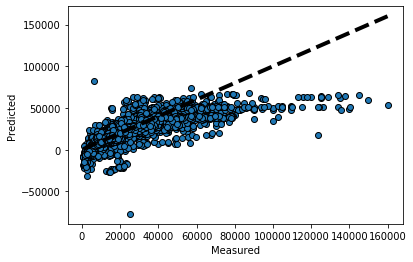

In [47]:
lr = LinearRegression()
predicted = cross_val_predict(lr, x_train, y_train, cv=3)
fig, ax = plt.subplots()
y= y_train
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [48]:
predicted = cross_val_score(lr, x_train, y_train, cv=12)
print("Accurancy(mean)=",mean(predicted),"Std=",predicted.std())

Accurancy(mean)= 0.7377992027151136 Std= 0.011131503547103499


Гиперпараметры для леса:

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {
    'n_estimators': [5, 100, 200],
    'max_depth': [3, 5, 7, 10]
}
rend = RandomizedSearchCV(RandomForestRegressor(), params)
rend.fit(x_train, y_train)
rend.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Хуже, чем прошлая модель на 0.9%

In [50]:
y_pred = rend.best_estimator_.predict(x_test)
r2_score(y_test, y_pred)

0.9009470180074284

Посмотрм, насколько "важны" новые параметры, включенные в модель.Оказвается transmission=Manual влияет на цену машины больше, чем год выпуска и вес.

In [51]:
reg = RandomForestRegressor(n_estimators=1000, max_depth=10, criterion='mse', random_state=123, n_jobs=-1)
reg.fit(x_train, y_train)
y_prediction = reg.predict(x_test)
r2_score(y_test, y_prediction)
feature_importances = pd.DataFrame(reg.feature_importances_,index = df_x.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances 

,importance
transmission=Manual,2.975916e-01
engineSize,2.495761e-01
year,2.435544e-01
mpg,1.413298e-01
mileage,3.830203e-02
tax,2.166537e-02
fuelType=Petrol,4.258870e-03
fuelType=Diesel,2.781639e-03
fuelType=Hybrid,3.241367e-04
transmission=Semi-Auto,3.091921e-04


Hard Построить модель стекинга над всеми моделями из задачи Normal + добавить один из градиентных бустингов XGBoost/LightGBM/CatBoost, если они не использовались. Удалось ли улучшить результат?

In [16]:
def preprocess_data(x):
    return (x - x.mean()) / x.std()

In [28]:
def fit_models(x_train, y_train, models):
    """Обучаем модели"""
    for model in models:
        model.fit(x_train, y_train)

def predict_base_models(x, models):
    """Предсказываем и нормируем прогнозы"""
    res = []
    for model in models:
        res.append(model.predict(x))
    base_predictions = np.array(res).T
    # Некоторые модели чувствительны к тому, чтобы на входе были нормированные данные
    return preprocess_data(base_predictions)

In [29]:
x_train = preprocess_data(x_train)
x_test = preprocess_data(x_test)

In [70]:
import xgboost as XGBRegressor

In [51]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [58]:
import xgboost as XGBRegressor

from sklearn.metrics import mean_squared_error

models = [
    RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=2),
    GradientBoostingRegressor( learning_rate=0.1, n_estimators=100, subsample=1.0, 
                  criterion='friedman_mse', max_depth=2),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
    ]

fit_models(x_train, y_train, models)
base_predictions = predict_base_models(x_train, models)


In [68]:
final_model = xgb.XGBRegressor()
final_model.fit(base_predictions, y_train)
base_predictions_test = predict_base_models(x_test,models)
base_predictions_test


array([[ 1.13338085, -0.20466726, -0.62199243],
       [ 1.13338085, -0.28996081, -0.39557191],
       [ 1.13338085, -0.45816178, -0.75991269],
       ...,
       [ 1.13338085, -0.20011271, -0.72769279],
       [ 1.13338085, -0.63050458, -0.618445  ],
       [ 1.13338085, -0.76444294, -0.74390806]])

In [69]:
y_pred = final_model.predict(base_predictions_test)
mean_squared_error(y_test, y_pred)

133525757.70999491

Что ж, вы можете видеть, что ваш RMSE для прогноза цены составил около 133525757 за 1000$, что говорит нам о очень неточной оценке модели.